In [28]:
%matplotlib inline  
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [29]:
path_archivos = '/home/alan/Escritorio/proyectos/VC1/vision_computadora_I/Material_TPs/TP1'

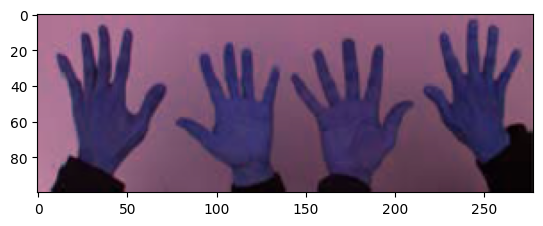

In [30]:
# Cargar una imagen en modo monocromático (un canal)
img_color = cv.imread(f"{path_archivos}/white_patch/test_blue.png")
plt.imshow(img_color)
plt.show()

In [31]:
def white_patch(img):

    img_float = img.astype(np.float32)

    max_vals = np.max(img_float, axis=(0, 1)) 
    scale = 255.0 / max_vals
    print("Valores maximos en cada canal:")
    print(f"Imagen original: {max_vals}")
    print(f"Imagen procesada:{scale}")

    balanced = img_float * scale

    balanced = np.clip(balanced, 0, 255).astype(np.uint8)
    
    # Mostrar resultados
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(balanced)
    plt.title("White Patch")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return balanced



Valores maximos en cada canal:
Imagen original: [210. 250. 171.]
Imagen procesada:[1.2142857 1.02      1.4912281]


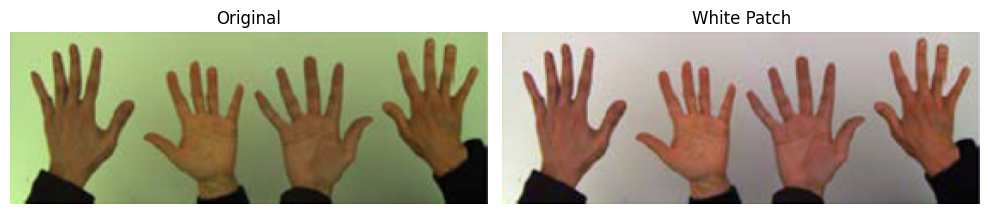

Valores maximos en cada canal:
Imagen original: [247. 157. 175.]
Imagen procesada:[1.0323887 1.6242038 1.4571428]


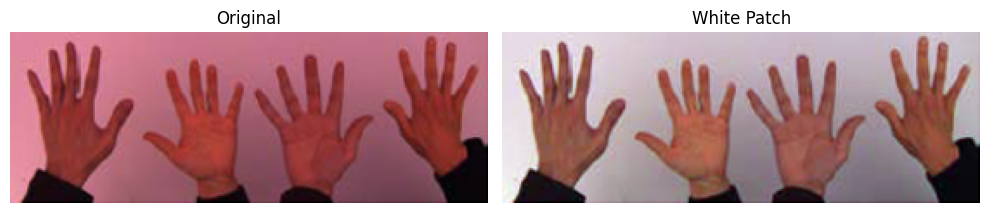

Valores maximos en cada canal:
Imagen original: [126. 252. 155.]
Imagen procesada:[2.0238094 1.0119047 1.6451613]


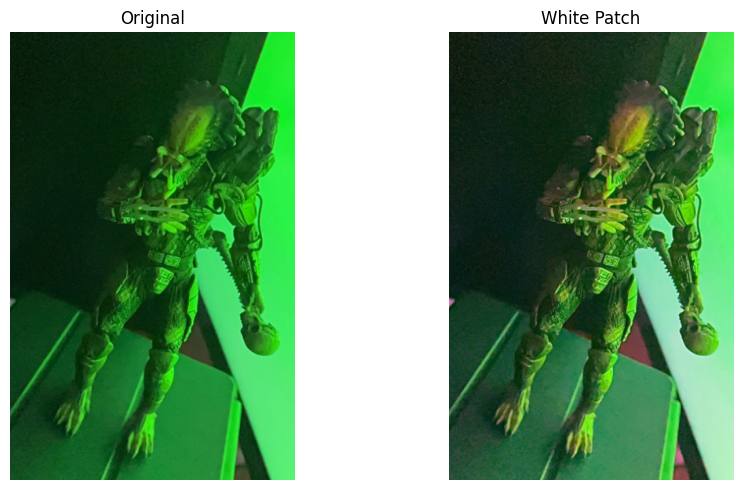

Valores maximos en cada canal:
Imagen original: [255. 134. 122.]
Imagen procesada:[1.        1.9029851 2.090164 ]


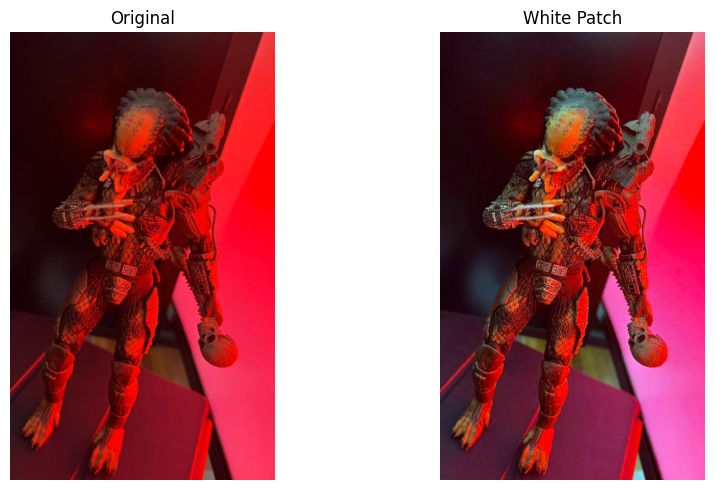

Valores maximos en cada canal:
Imagen original: [255. 255. 255.]
Imagen procesada:[1. 1. 1.]


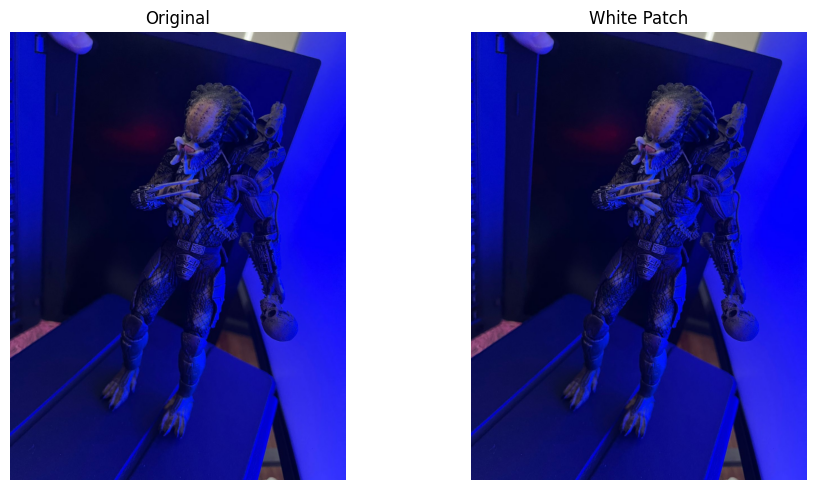

Valores maximos en cada canal:
Imagen original: [255. 201. 203.]
Imagen procesada:[1.        1.2686567 1.2561576]


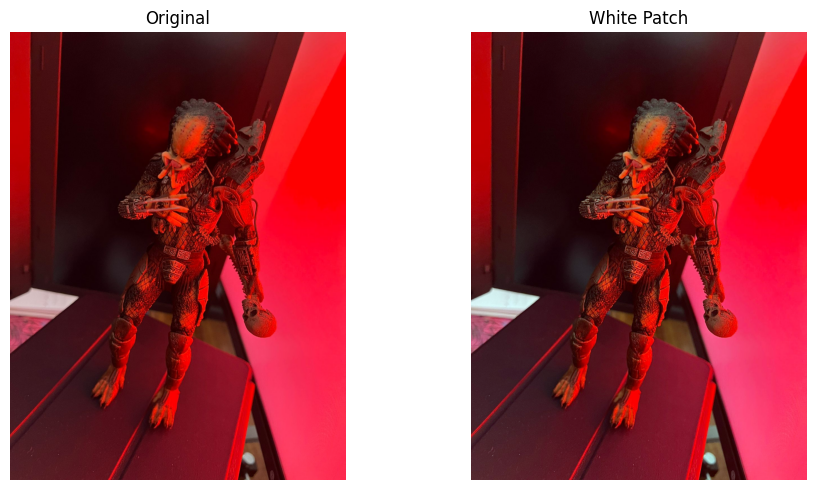

Valores maximos en cada canal:
Imagen original: [170. 255. 172.]
Imagen procesada:[1.5       1.        1.4825581]


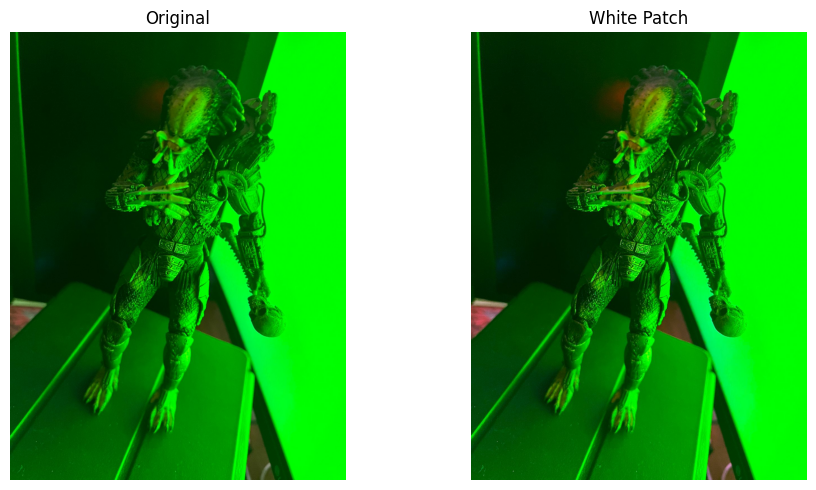

Valores maximos en cada canal:
Imagen original: [165. 138. 200.]
Imagen procesada:[1.5454545 1.8478261 1.275    ]


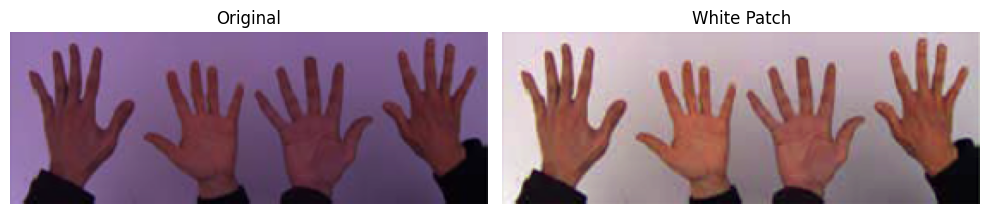

In [32]:
for nombre_archivo in os.listdir(f"{path_archivos}/white_patch"):
        ruta_completa = os.path.join(f"{path_archivos}/white_patch", nombre_archivo)

        # Leer imagen en BGR y convertir a RGB
        img_bgr = cv.imread(ruta_completa)
        img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

        # Aplicar White Patch
        img_wp = white_patch(img_rgb)

Notamos en los casos de wp_blue y wp_green2 que el algoritmo no genera un impacto significativo en el contraste y el cambio de escala de los píxeles de la imagen. Esto se debe a que los valores de los píxeles en los tres canales tienden a valores cercanos a 255 y cercanos entre ellos, lo cual genera un valor de normalización cercano a 1 y genera como resultado una imagen de iluminación muy similar.

[[  2   3   4 ...  13  13  14]
 [ 14  14  14 ...  20  20  20]
 [ 20  20  20 ...  22  22  22]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


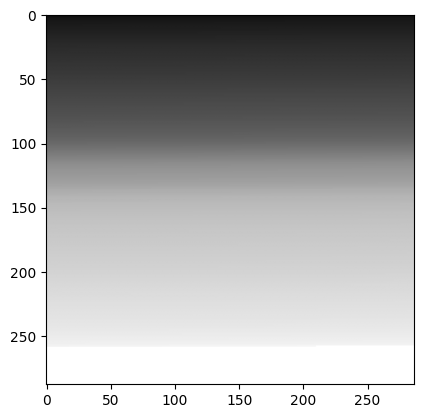

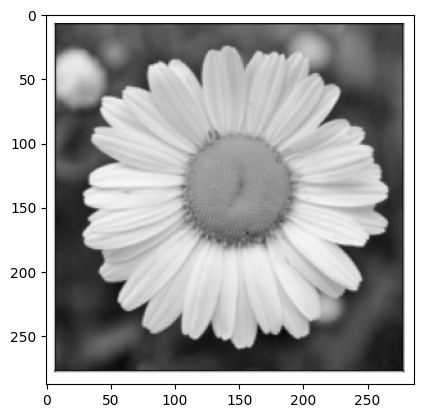

In [33]:
# Cargar una imagen en modo monocromático (un canal)
img_tp_1 = cv.imread(f"{path_archivos}/img1_tp.png", cv.IMREAD_GRAYSCALE)
img_tp_2 = cv.imread(f"{path_archivos}/img2_tp.png", cv.IMREAD_GRAYSCALE)

# Dimensión de la imagen
print(img_tp_1)
print(img_tp_2)

plt.figure()
plt.imshow(img_tp_1,cmap='gray')
plt.show()

plt.figure()
plt.imshow(img_tp_2,cmap='gray')
plt.show()

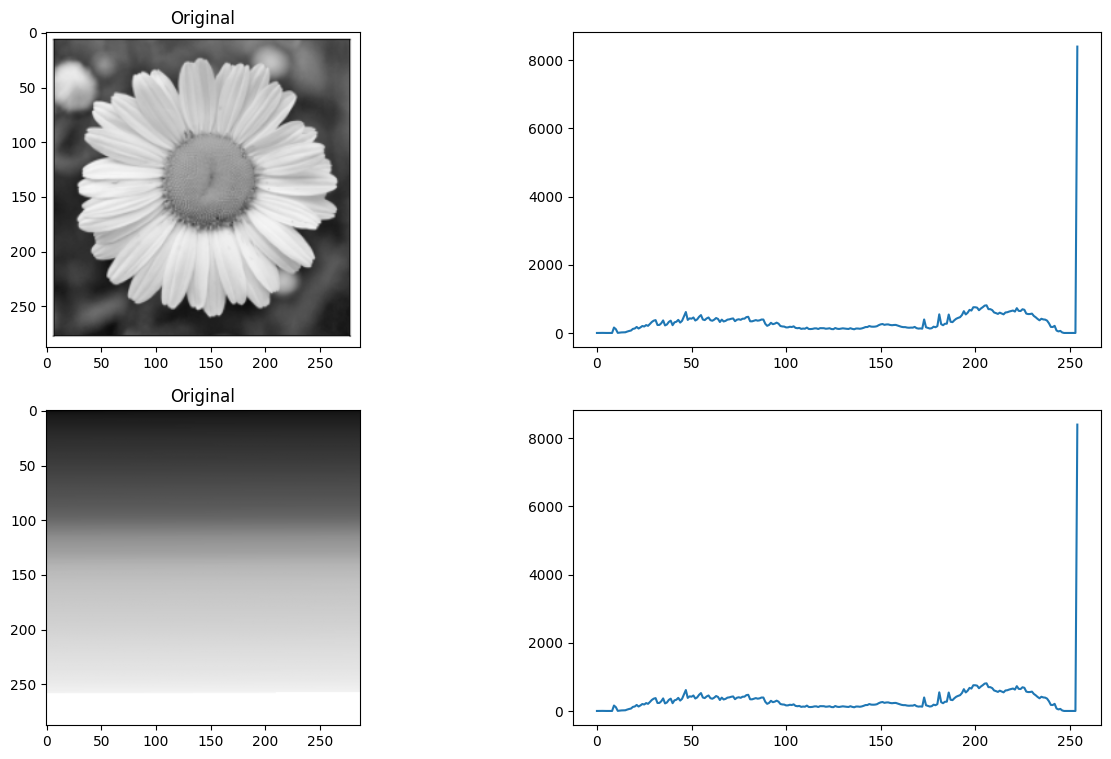

In [34]:
# Nueva figura
fig = plt.figure(figsize=(15, 9))

# Imagen original
ax1=plt.subplot(221)
ax1.imshow(img_tp_2, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original')

hist1,bins1 = np.histogram(img_tp_2.ravel(),255,[0,256])
ax3=plt.subplot(222)
ax3.plot(hist1)

# Imagen original
ax2=plt.subplot(223)
ax2.imshow(img_tp_1, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Original')

hist2,bins2 = np.histogram(img_tp_1.ravel(),255,[0,256])
ax4=plt.subplot(224)
ax4.plot(hist2)

plt.show()

Se observa que por la similitud de distribución de píxeles en los histogramas de ambas imagenes, que los mismos reflejan comportamientos muy similares. Por lo cual, si utilizaramos esta variable como un feature de clasificación, probablemente generaría muchos errores y sería muy impreciso ya que no es un dato que me logre diferenciar de manera clara una imagen de otra.